In [65]:
import pandas as pd
import toml
import streamlit as st
import pandas as pd
import gcsfs
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import pandas as pd
from urllib.parse import urlparse, parse_qs
import numpy as np
from datetime import datetime


import pandas as pd

def load_and_merge_csv(folder_path, file_names):
    all_data = pd.DataFrame()
    for file_name in file_names:
        file_path = f'{folder_path}/{file_name}'
        df = pd.read_csv(file_path)
        all_data = pd.concat([all_data, df], ignore_index=True)
    return all_data

# Replace 'folder_path' with the actual path to your 'data' folder
# Replace 'file_names' with the actual names of your csv files
folder_path = 'data'  # Example folder path
file_names = ['airbnb_final_listings_2024_4.csv', 'airbnb_final_listings_2024_5.csv', 'airbnb_final_listings_2024_6.csv','airbnb_final_listings_2024_7.csv']


data = load_and_merge_csv(folder_path, file_names)

data.to_csv('check.csv')


In [66]:
data.head()

,Title,Subtitle,Detail,Price,URL,Bedrooms,Review_rating,Superhost,Competitor,Livinparis,Listing_id
0,Apartment in Temple,NaN,Chic 3-Bedroom Oasis - Etienne Marcel / Marais,"€ 1,474 total",https://www.airbnb.com/rooms/48562341?adults=6...,2,4.29 (100),Guest favorite,No,No,48562341
1,Apartment in Temple,NaN,"4 beds\n4 beds\n3 bedrooms\n,\n · 3 bedrooms","€ 2,400 total",https://www.airbnb.com/rooms/76125183608642363...,2,4.78 (9),Superhost,No,No,761251836086423636
2,Apartment in Batignolles,NaN,122 - Urban in Montorgueil,"€ 1,486 total",https://www.airbnb.com/rooms/42891730?adults=6...,2,4.4 (142),Superhost,No,No,42891730
3,Apartment in Opéra,NaN,"10 beds\n10 beds\n4 bedrooms\n,\n · 4 bedrooms","€ 3,717 total",https://www.airbnb.com/rooms/10795536747584636...,2,New,Superhost,No,No,1079553674758463661
4,Apartment in Opéra,NaN,Amazing apartment - 3BR/8P - Batignolles /Piga...,"€ 1,767 total",https://www.airbnb.com/rooms/76643116820329717...,2,4.44 (18),Apr 2 – 4,No,No,766431168203297178


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12015 entries, 0 to 12014
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          12015 non-null  object 
 1   Subtitle       0 non-null      float64
 2   Detail         12015 non-null  object 
 3   Price          12015 non-null  object 
 4   URL            12015 non-null  object 
 5   Bedrooms       12015 non-null  int64  
 6   Review_rating  11012 non-null  object 
 7   Superhost      3654 non-null   object 
 8   Competitor     12015 non-null  object 
 9   Livinparis     12015 non-null  object 
 10  Listing_id     12015 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.0+ MB


In [68]:
data.isnull().sum()

Title                0
Subtitle         12015
Detail               0
Price                0
URL                  0
Bedrooms             0
Review_rating     1003
Superhost         8361
Competitor           0
Livinparis           0
Listing_id           0
dtype: int64

In [69]:
#GOOD
import pandas as pd
from urllib.parse import urlparse, parse_qs

def clean_transform_data(df):
    # Extract and clean the Price column
    df['Price'] = df['Price'].str.extract(r'€ (\d+,\d+|\d+)')[0].str.replace(',', '').astype(float)

    
    # Extract Check_in and Check_out dates from the URL column
    df['Check_in'] = df['URL'].apply(lambda x: pd.to_datetime(parse_qs(urlparse(x).query).get('check_in', [None])[0]))
    df['Check_out'] = df['URL'].apply(lambda x: pd.to_datetime(parse_qs(urlparse(x).query).get('check_out', [None])[0]))
    
    # Calculate the number of nights
    df['number_nights'] = (df['Check_out'] - df['Check_in']).dt.days
    
    # Calculate Price per night; handle NaN nights
    df['Price_per_night'] = df.apply(lambda row: row['Price'] / row['number_nights'] if row['number_nights'] > 0 else None, axis=1)
    
    # Extract day of week for Check-in and Check-out
    df['Check_in_day'] = df['Check_in'].dt.dayofweek
    df['Check_out_day'] = df['Check_out'].dt.dayofweek
    
    # Determine if the period is a Weekend or Weekday stay
    df['Period'] = df.apply(lambda row: 'Weekend' if 5 <= row['Check_in_day'] <= 6 or 5 <= row['Check_out_day'] <= 6 else 'Weekday', axis=1)
    
    df = df.dropna(subset=['Price'])

    return df

# Assuming `data` is your DataFrame with Airbnb listings
data_clean = clean_transform_data(data)

# Display the cleaned and transformed DataFrame
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12015 entries, 0 to 12014
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            12015 non-null  object        
 1   Subtitle         0 non-null      float64       
 2   Detail           12015 non-null  object        
 3   Price            12015 non-null  float64       
 4   URL              12015 non-null  object        
 5   Bedrooms         12015 non-null  int64         
 6   Review_rating    11012 non-null  object        
 7   Superhost        3654 non-null   object        
 8   Competitor       12015 non-null  object        
 9   Livinparis       12015 non-null  object        
 10  Listing_id       12015 non-null  int64         
 11  Check_in         12015 non-null  datetime64[ns]
 12  Check_out        12015 non-null  datetime64[ns]
 13  number_nights    12015 non-null  int64         
 14  Price_per_night  11961 non-null  float

In [70]:
data_clean.head()

,Title,Subtitle,Detail,Price,URL,Bedrooms,Review_rating,Superhost,Competitor,Livinparis,Listing_id,Check_in,Check_out,number_nights,Price_per_night,Check_in_day,Check_out_day,Period
0,Apartment in Temple,NaN,Chic 3-Bedroom Oasis - Etienne Marcel / Marais,1474.0,https://www.airbnb.com/rooms/48562341?adults=6...,2,4.29 (100),Guest favorite,No,No,48562341,2024-04-01,2024-04-05,4,368.50,0,4,Weekday
1,Apartment in Temple,NaN,"4 beds\n4 beds\n3 bedrooms\n,\n · 3 bedrooms",2400.0,https://www.airbnb.com/rooms/76125183608642363...,2,4.78 (9),Superhost,No,No,761251836086423636,2024-04-01,2024-04-05,4,600.00,0,4,Weekday
2,Apartment in Batignolles,NaN,122 - Urban in Montorgueil,1486.0,https://www.airbnb.com/rooms/42891730?adults=6...,2,4.4 (142),Superhost,No,No,42891730,2024-04-01,2024-04-05,4,371.50,0,4,Weekday
3,Apartment in Opéra,NaN,"10 beds\n10 beds\n4 bedrooms\n,\n · 4 bedrooms",3717.0,https://www.airbnb.com/rooms/10795536747584636...,2,New,Superhost,No,No,1079553674758463661,2024-04-01,2024-04-05,4,929.25,0,4,Weekday
4,Apartment in Opéra,NaN,Amazing apartment - 3BR/8P - Batignolles /Piga...,1767.0,https://www.airbnb.com/rooms/76643116820329717...,2,4.44 (18),Apr 2 – 4,No,No,766431168203297178,2024-04-01,2024-04-05,4,441.75,0,4,Weekday


In [71]:
livin_paris_data = data_clean[data_clean['Livinparis'] == 'Yes']
competitors_data = data_clean[data_clean['Competitor'] == 'Yes']

print(livin_paris_data.shape[0])
print(competitors_data.shape[0])

304
1254


2024-03-24 16:49:57.055 
  command:

    streamlit run /Users/gonzalo/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

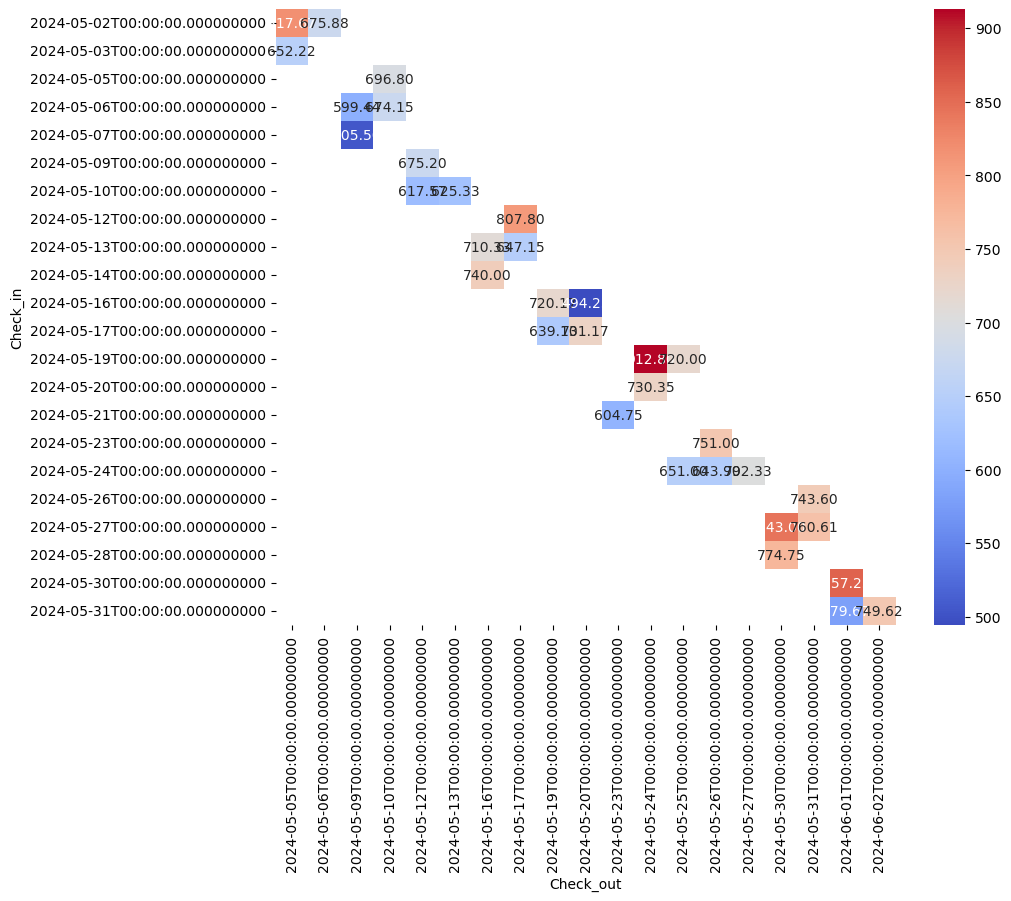

In [74]:
def generate_heatmap_data(df, year, month, bedrooms):
    # Filter by year, month, and bedrooms
    filtered_df = df[(df['Check_in'].dt.year == year) &
                     (df['Check_in'].dt.month == month) &
                     (df['Bedrooms'] == bedrooms)]
    
    # Pivot table to aggregate average price per night by check-in and check-out dates
    pivot_table = filtered_df.pivot_table(values='Price_per_night', 
                                          index='Check_in', 
                                          columns='Check_out', 
                                          aggfunc=np.mean)
    return pivot_table

heatmap_data = generate_heatmap_data(data_clean, 2024, 5, 2)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
st.pyplot(plt)


In [28]:
def clean_transform_data(df):
    # Extract check-in and check-out dates from URL
    df['Check_in'] = df['URL'].apply(lambda x: parse_qs(urlparse(x).query).get('checkin', [''])[0])
    df['Check_out'] = df['URL'].apply(lambda x: parse_qs(urlparse(x).query).get('checkout', [''])[0])
    
    # Convert check-in and check-out to datetime
    df['Check_in'] = pd.to_datetime(df['Check_in'])
    df['Check_out'] = pd.to_datetime(df['Check_out'])
    
    # Calculate number of nights
    df['number_nights'] = (df['Check_out'] - df['Check_in']).dt.days
    
    # Calculate the price per night and total price
    df['Price'] = df['Price'].str.extract(r'€ (\d+,\d+)')[0].str.replace(',', '').astype(float)
    df['Price_per_night'] = df['Price'] / df['number_nights']
    
    # Extract the weekday for check-in and check-out
    df['Check_in_day'] = df['Check_in'].dt.dayofweek
    df['Check_out_day'] = df['Check_out'].dt.dayofweek
    
    # Determine if the stay is during a weekday or a weekend
    df['Period'] = df.apply(lambda row: 'Weekend' if row['Check_in_day'] in [5, 6] or row['Check_out_day'] in [5, 6] else 'Weekday', axis=1)
    
    # Format the interval as a string
    df['Interval'] = df.apply(lambda row: f"{row['Check_in'].strftime('%Y-%m-%d')} to {row['Check_out'].strftime('%Y-%m-%d')}", axis=1)
    
    return df

# Assume `data` is your DataFrame
data_clean = clean_transform_data(data)


def analysis_on_livinparis(df):
    
    
    



ValueError: NaTType does not support strftime

In [ ]:
livin_paris_data = data_clean[data_clean['Livinparis'] == 'Yes']
competitors_data = data_clean[data_clean['Competitor'] == 'Yes']

In [80]:
livin_paris_data[livin_paris_data[['Bedrooms']==2]].sum()

KeyError: False

In [13]:
data_clean.head()

,Title,Subtitle,Detail,Price,URL,Bedrooms,Review_rating,Superhost,Check_in,Check_out,Competitor,Livinparis,Listing_id,number_nights,Interval,Check_in_day,Check_out_day,Price_per_night,Period
0,Apartment in Bonne-Nouvelle,NaN,Amazing Apartment - 8P/3BR - Trail/Bonne-New,1279.0,https://www.airbnb.com/rooms/77748934103156675...,2,4.62 (61),Superhost,2024-05-03,2024-05-05,No,No,777489341031566750,2,2024-05-03 to 2024-05-05,4,6,639.5,Weekend
1,Apartment in Les Halles,NaN,"4 beds\n4 beds\n3 bedrooms\n,\n · 3 bedrooms",1009.0,https://www.airbnb.com/rooms/71938235740089320...,2,4.5 (58),Superhost,2024-05-03,2024-05-05,No,No,719382357400893205,2,2024-05-03 to 2024-05-05,4,6,504.5,Weekend
2,Apartment in Bonne-Nouvelle,NaN,Superb apartment in Paris - Louvre / Halles I,NaN,https://www.airbnb.com/rooms/10353085911897445...,2,5.0 (4),Guest favorite,2024-05-03,2024-05-05,No,No,1035308591189744528,2,2024-05-03 to 2024-05-05,4,6,NaN,Weekend
3,Apartment in Les Halles,NaN,"3 beds\n3 beds\n2 bedrooms\n,\n · 2 bedrooms",NaN,https://www.airbnb.com/rooms/11141976546477396...,2,New,Superhost,2024-05-03,2024-05-05,No,No,1114197654647739635,2,2024-05-03 to 2024-05-05,4,6,NaN,Weekend
4,Apartment in Paris,NaN,Modern Paris center apartment,1597.0,https://www.airbnb.com/rooms/10687596265598124...,2,New,Guest favorite,2024-05-03,2024-05-05,No,Yes,1068759626559812433,2,2024-05-03 to 2024-05-05,4,6,798.5,Weekend


In [15]:
livin_paris_data

,Title,Subtitle,Detail,Price,URL,Bedrooms,Review_rating,Superhost,Check_in,Check_out,Competitor,Livinparis,Listing_id,number_nights,Interval,Check_in_day,Check_out_day,Price_per_night,Period
4,Apartment in Paris,NaN,Modern Paris center apartment,1597.0,https://www.airbnb.com/rooms/10687596265598124...,2,New,Guest favorite,2024-05-03,2024-05-05,No,Yes,1068759626559812433,2,2024-05-03 to 2024-05-05,4,6,798.50,Weekend
122,Apartment in Bonne-Nouvelle,NaN,Sublim apart «la marquise »paris centterrace 2bh,NaN,https://www.airbnb.com/rooms/27747787?adults=6...,2,4.83 (236),NaN,2024-05-06,2024-05-10,No,Yes,27747787,4,2024-05-06 to 2024-05-10,0,4,NaN,Weekday
130,Apartment in Paris,NaN,PARIS CITY FLAT Appt entier N°106,NaN,https://www.airbnb.com/rooms/72590421217904229...,2,4.92 (84),NaN,2024-05-06,2024-05-10,No,Yes,725904212179042294,4,2024-05-06 to 2024-05-10,0,4,NaN,Weekday
209,Apartment in Paris,NaN,"3 beds\n3 beds\n2 bedrooms\n,\n · 2 bedrooms",1349.0,https://www.airbnb.com/rooms/72590421217904229...,2,4.92 (84),Superhost,2024-05-10,2024-05-12,No,Yes,725904212179042294,2,2024-05-10 to 2024-05-12,4,6,674.50,Weekend
308,Apartment in Paris,NaN,Charming Loft in the Heart of the 10th,2707.0,https://www.airbnb.com/rooms/10687596265598124...,2,New,Guest favorite,2024-05-13,2024-05-17,No,Yes,1068759626559812433,4,2024-05-13 to 2024-05-17,0,4,676.75,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,Apartment in Paris,NaN,"10 beds\n10 beds\n4 bedrooms\n,\n · 4 bedrooms",1780.0,https://www.airbnb.com/rooms/19230958?adults=1...,4,4.85 (239),Superhost,2024-05-17,2024-05-19,No,Yes,19230958,2,2024-05-17 to 2024-05-19,4,6,890.00,Weekend
7767,Apartment in Paris,NaN,"5 beds\n5 beds\n5 bedrooms\n,\n · 5 bedrooms",NaN,https://www.airbnb.com/rooms/25155033?adults=1...,4,NaN,NaN,2024-05-17,2024-05-19,No,Yes,25155033,2,2024-05-17 to 2024-05-19,4,6,NaN,Weekend
7949,Apartment in Paris,NaN,"6 beds\n6 beds\n4 bedrooms\n,\n · 4 bedrooms",1787.0,https://www.airbnb.com/rooms/10846985153734059...,4,New,May 23 – 26,2024-05-24,2024-05-26,No,Yes,1084698515373405958,2,2024-05-24 to 2024-05-26,4,6,893.50,Weekend
8160,Apartment in Paris,NaN,B0 Appart 2022 - 10min PARIS/EXPO - 5 rooms/6 ...,1927.0,https://www.airbnb.com/rooms/25155033?adults=1...,4,4.98 (183),May 31 – Jun 2,2024-05-31,2024-05-31,No,Yes,25155033,0,2024-05-31 to 2024-05-31,4,4,inf,Weekday


In [ ]:
"""
filtered_livin_paris = livin_paris_data[(livin_paris_data['Check_in'].dt.month_name() == month_selection) & (livin_paris_data['Bedrooms'] == bedroom_selection)]
filtered_competitors = competitors_data[(competitors_data['Check_in'].dt.month_name() == month_selection) & (competitors_data['Bedrooms'] == bedroom_selection)]

# Pivot tables for LivinParis and Competitors
pivot_livin = filtered_livin_paris.pivot_table(values='Price_per_night', index='Bedrooms', columns='Interval', aggfunc='mean').fillna(0)
pivot_competitors = filtered_competitors.pivot_table(values='Price_per_night', index='Bedrooms', columns='Interval', aggfunc='mean').fillna(0)

# Calculate percentage difference
percentage_difference = calculate_percentage_difference(filtered_livin_paris, filtered_competitors)

# Visualize the heatmaps
st.header('Percentage Difference between LivinParis and Competitors')

# Custom colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)

sns.heatmap(percentage_difference, annot=True, fmt=".2f", cmap=cmap, center=0,
            cbar_kws={'label': 'Percentage Difference'})
st.pyplot(plt)


st.download_button(
    label="Download data as CSV",
    data=data.to_csv().encode('utf-8'),
    file_name='consolidated_data.csv',
    mime='text/csv',
)


# Pivot table for Livin Paris
livin_paris_data = filtered_data[filtered_data['Livinparis'] == 'Yes']
pivot_table_livin_paris = livin_paris_data.pivot_table(
    values='Price_per_night',
    index='Bedrooms',
    columns='Interval',
    aggfunc='mean'
).fillna(0)

# Pivot table for Competitors
competitors_data = filtered_data[filtered_data['Competitor'] == 'Yes']
pivot_table_competitors = competitors_data.pivot_table(
    values='Price_per_night',
    index='Bedrooms',
    columns='Interval',
    aggfunc='mean'
).fillna(0)

# Display heatmaps
st.header('Livin Paris Average Price Per Night')
fig, ax = plt.subplots()
sns.heatmap(pivot_table_livin_paris, annot=True, fmt=".2f", cmap='Blues', ax=ax)
st.pyplot(fig)

st.header('Competitors Average Price Per Night')
fig, ax = plt.subplots()
sns.heatmap(pivot_table_competitors, annot=True, fmt=".2f", cmap='Blues', ax=ax)
st.pyplot(fig)
"""
